Name: Madhav Jha

Roll: E3-48

Branch: CSE(AIML)

# DL lab: 8

## AIM: Write a program to implement RNN and LSTM on sunspots dataset for different time steps as 5,8,12,15. ALso, comapre the results for training and testing accuracy.

Epoch 1/100
57/57 [==============================] - 2s 14ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 2/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/100
57/57 [==============================] - 0s 6ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 4/100
57/57 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 5/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 6/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 7/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 8/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 9/100
57/57 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 10/100
57/57 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0035
Epoch 11

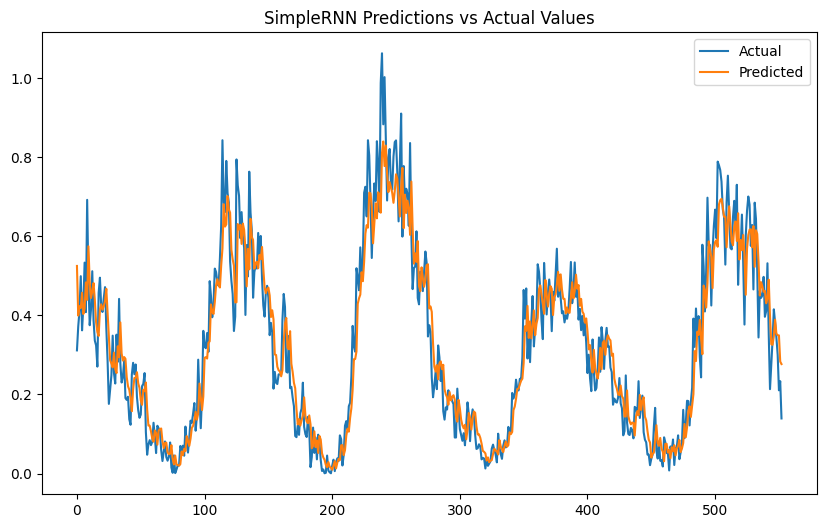

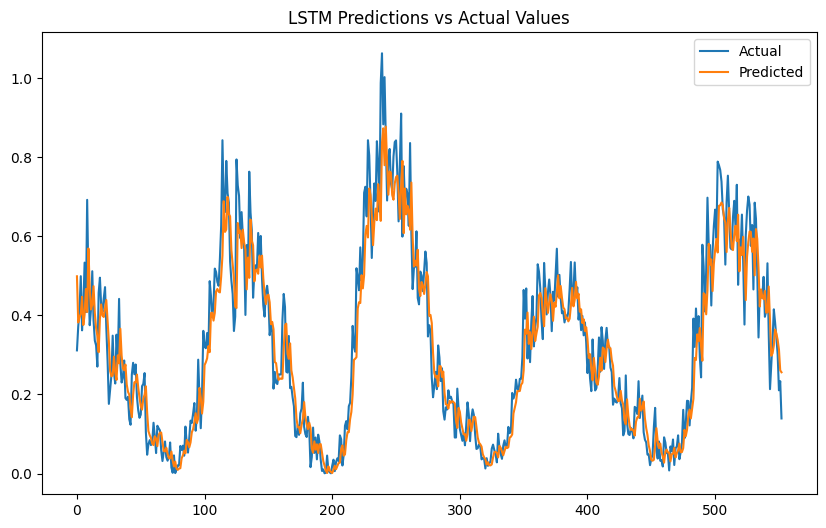

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Load the sunspot dataset from CSV file
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv')

# Convert the dataframe to a numpy array
data = np.array(df['Sunspots'])

# Split the data into training and testing sets (80:20)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Normalize the data
max_value = np.max(train_data)
train_data = train_data / max_value
test_data = test_data / max_value

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the SimpleRNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=64, input_shape=(seq_length, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Train the SimpleRNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the SimpleRNN model on the testing set
rnn_loss = rnn_model.evaluate(X_test, y_test, verbose=0)
print('SimpleRNN Test Loss:', rnn_loss)

# Make predictions using the SimpleRNN model
rnn_predictions = rnn_model.predict(X_test)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(seq_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the LSTM model on the testing set
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print('LSTM Test Loss:', lstm_loss)

# Make predictions using the LSTM model
lstm_predictions = lstm_model.predict(X_test)

# Plot the actual and predicted values for the SimpleRNN model
plt.figure(figsize=(10, 6))
plt.plot(y_test)
plt.plot(rnn_predictions)
plt.title('SimpleRNN Predictions vs Actual Values')
plt.legend(['Actual', 'Predicted'])
# plt.show()

# Plot the actual and predicted values for the LSTM model
plt.figure(figsize=(10, 6))
plt.plot(y_test)
plt.plot(lstm_predictions)
plt.title('LSTM Predictions vs Actual Values')
plt.legend(['Actual', 'Predicted'])
# plt.show()